# 자료의 비선형성(Non linear correlations)

<img src='https://images.unsplash.com/photo-1528067753492-69dda1cd56df?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NXx8Y3VydmV8ZW58MHx8MHx8&auto=format&fit=crop&w=800&q=60' width=300 height=300>

https://towardsdatascience.com/non-linear-correlation-matrix-the-much-needed-technique-which-nobody-talks-about-132bc02ce632

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn

### https://www.autodesk.com/research/publications/same-stats-different-graphs

## Anscombe's quartet
Anscombe's quartet is a group of datasets (x, y) that have the same mean, standard deviation, and regression line, but which are qualitatively different.

In [2]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [3]:
df.groupby('dataset')['x'].agg(['mean', 'var'])

,mean,var
dataset,,
I,9.0,11.0
II,9.0,11.0
III,9.0,11.0
IV,9.0,11.0


In [4]:
for i, g in df.groupby('dataset'):
    corr = g['x'].corr(g['y'])
    print(f'{i} 그룹 : x y 상관관계 {corr}')

I 그룹 : x y 상관관계 0.81642051634484
II 그룹 : x y 상관관계 0.8162365060002428
III 그룹 : x y 상관관계 0.8162867394895984
IV 그룹 : x y 상관관계 0.8165214368885028


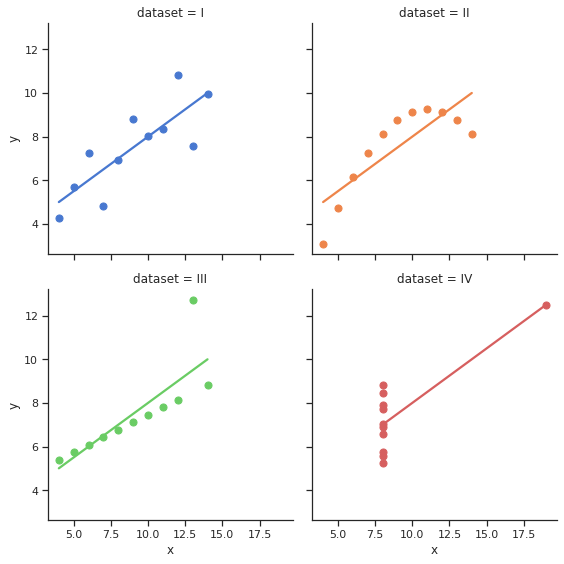

In [5]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

- https://www.autodeskresearch.com/publications/samestats 

- https://www.tableau.com/ko-kr/learn/articles/best-beautiful-data-visualization-examples

In [6]:
from sklearn.datasets import fetch_openml

In [7]:
import pandas as pd
import numpy as np
data = fetch_openml(name='pc1')
data.url
data.keys()
df = pd.DataFrame(np.c_[data.data, data.target], columns= data.feature_names + ['target'])
df.head()

'https://www.openml.org/d/1068'

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,target
0,1.1,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,false
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,true
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80.0,44.0,11.0,31.0,29.0,66.0,192.0,126.0,17.0,true
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97.0,41.0,12.0,24.0,28.0,75.0,229.0,152.0,38.0,true
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457.0,71.0,48.0,49.0,64.0,397.0,1397.0,942.0,178.0,true


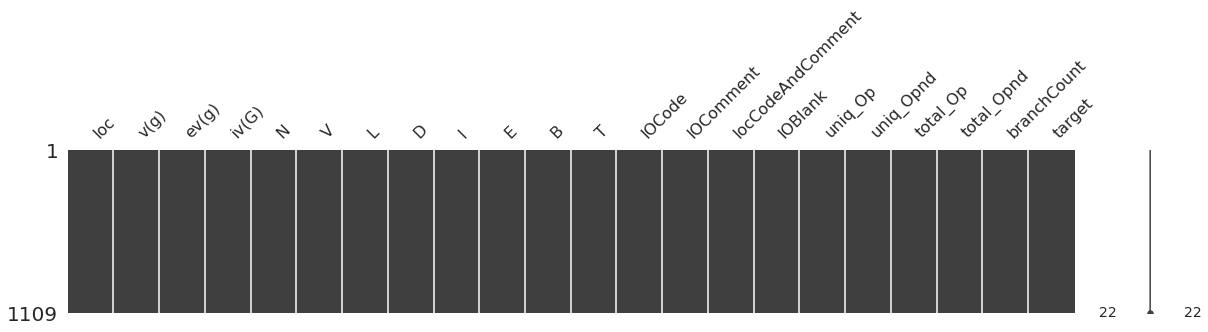

In [8]:
import missingno as msno
msno.matrix(df, figsize=(20,3))

In [9]:
df.target.value_counts()

false    1032
true       77
Name: target, dtype: int64

In [10]:
df.target.replace({'false':0, 'true':1}, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   loc                1109 non-null   object
 1   v(g)               1109 non-null   object
 2   ev(g)              1109 non-null   object
 3   iv(G)              1109 non-null   object
 4   N                  1109 non-null   object
 5   V                  1109 non-null   object
 6   L                  1109 non-null   object
 7   D                  1109 non-null   object
 8   I                  1109 non-null   object
 9   E                  1109 non-null   object
 10  B                  1109 non-null   object
 11  T                  1109 non-null   object
 12  lOCode             1109 non-null   object
 13  lOComment          1109 non-null   object
 14  locCodeAndComment  1109 non-null   object
 15  lOBlank            1109 non-null   object
 16  uniq_Op            1109 non-null   object


In [12]:
data = df.astype('float64')

In [22]:
data.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(G)                float64
N                    float64
V                    float64
L                    float64
D                    float64
I                    float64
E                    float64
B                    float64
T                    float64
lOCode               float64
lOComment            float64
locCodeAndComment    float64
lOBlank              float64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
target               float64
dtype: object

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text major ticklabel objects>)

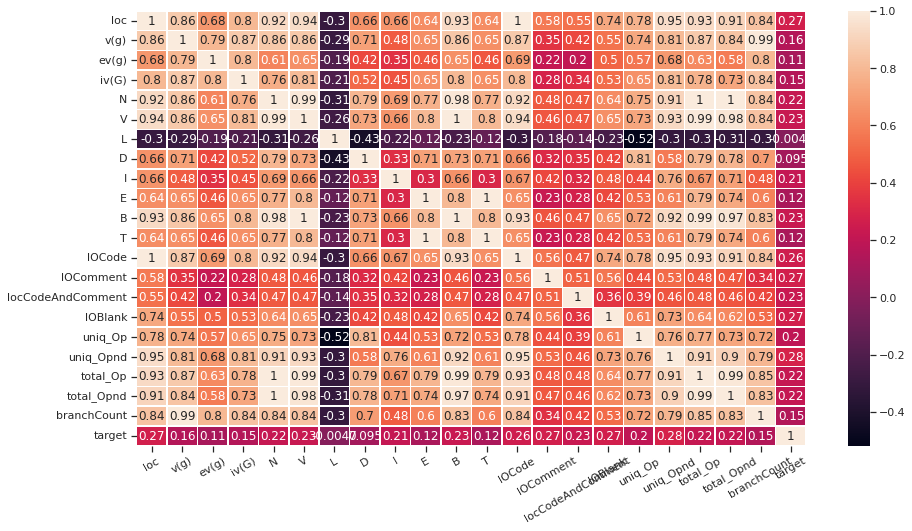

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(data = data.corr().fillna(0), annot = True, linewidths=.5, ax=ax)
plt.xticks(rotation=30)

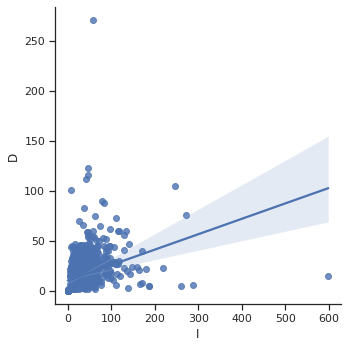

In [24]:
sns.lmplot(x="I", y="D", data=data)

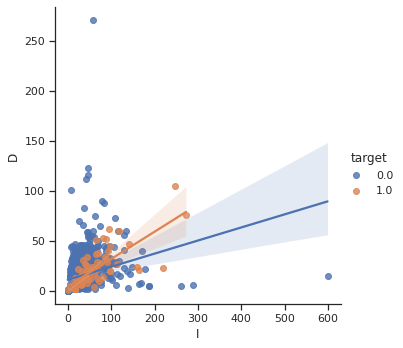

In [ ]:
sns.lmplot(x="I", y="D", hue="target", data=data)

# End